# **Appendix A**




**Predictive Analysis of Diabetes**

In [ ]:
# Necessary Imports 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

**Preprocessing & EDA:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading in the dataset
#diabetes_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2015.csv')

In [ ]:
# Loading in the dataset from shared drive
diabetes_df = pd.read_csv('/content/drive/Shared drives/ADS504/2015.csv', 
                          engine='python')

In [ ]:
# Visualizing the data 
diabetes_df.head(2)

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1,1,b'01292015',b'01',b'29',b'2015',1200,2015000001,2015000001,1.0,...,4,2,1.0,1.0,1.0,1,1,NaN,NaN,1.0
1,1,1,b'01202015',b'01',b'20',b'2015',1100,2015000002,2015000002,1.0,...,2,2,3.0,3.0,4.0,2,2,NaN,NaN,2.0


In [ ]:
# checking size of the data 
diabetes_df.shape

(441456, 330)

Total of 330 columns and 441,456 rows of data. There are too many columns to work with. Columns to remove: empty columns, redundant columns, and irrelvant columns.

In [ ]:
# Dimensionality Reduction 

# Looking for any empty columns (85% or higher was empty) 
nan_cols85 = [i for i in diabetes_df.columns if diabetes_df[i].isnull().sum()\
              > 0.85*len(diabetes_df)]

# nan_cols85 <- was too long so it's included below in a condensed format 

In [ ]:
# Removal of Empty Columns 
diabetes_df85 = diabetes_df.copy(deep=True) 
diabetes_df85 = diabetes_df85.drop(['COLGHOUS','LADULT','CCLGHOUS','ASTHNOW',
'DIABAGE2','NUMPHON2','PREGNANT','STOPSMK2','INSULIN','BLDSUGAR','FEETCHK2',
'DOCTDIAB','CHKHEMO3','FEETCHK','EYEEXAM','DIABEYE', 'DIABEDU', 'PAINACT2', 
'QLMENTL2', 'QLSTRES2', 'QLHLTH2', 'CRGVREL1', 'CRGVLNG1', 'CRGVHRS1', 
'CRGVPRB1', 'CRGVPERS', 'CRGVHOUS', 'CRGVMST2', 'VIDFCLT2', 'VIREDIF3', 
'VIPRFVS2', 'VINOCRE2', 'VIEYEXM2', 'VIINSUR2', 'VICTRCT4', 'VIGLUMA2', 
'VIMACDG2', 'CDHOUSE', 'CDASSIST', 'CDHELP', 'CDSOCIAL', 'CDDISCUS', 'WTCHSALT', 
'LONGWTCH', 'DRADVISE', 'ASTHMAGE', 'ASATTACK', 'ASERVIST', 'ASDRVIST', 
'ASRCHKUP', 'ASACTLIM', 'ASYMPTOM', 'ASNOSLEP', 'ASTHMED3', 'ASINHALR', 
'HAREHAB1', 'STREHAB1', 'CVDASPRN', 'ASPUNSAF', 'RLIVPAIN', 'RDUCHART', 
'RDUCSTRK', 'ARTTODAY', 'ARTHWGT', 'ARTHEXER', 'ARTHEDU', 'TETANUS', 'HPVADVC2', 
'HPVADSHT', 'SHINGLE2', 'HADMAM', 'HOWLONG', 'HADPAP2', 'LASTPAP2', 'HPVTEST', 
'HPLSTTST', 'HADHYST2', 'PROFEXAM', 'LENGEXAM', 'BLDSTOOL', 'LSTBLDS3', 
'HADSIGM3', 'HADSGCO1', 'LASTSIG3', 'PCPSAAD2', 'PCPSADI1', 'PCPSARE1', 
'PSATEST1', 'PSATIME', 'PCPSARS1', 'PCPSADE1', 'SCNTPAID', 'SCNTWRK1', 
'SCNTLPAD', 'SCNTLWK1', 'RCSGENDR', 'RCSRLTN2', 'CASTHDX2', 'CASTHNO2', 
'EMTSUPRT', 'LSATISFY', 'ADPLEASR', 'ADDOWN', 'ADSLEEP', 'ADENERGY', 'ADEAT1', 
'ADFAIL', 'ADTHINK', 'ADMOVE', 'MISTMNT', 'ADANXEV', '_CRACE1', '_CPRACE', 
'_CLLCPWT'], axis=1)

In [ ]:
diabetes_df85.shape

(441456, 216)

List of empty columns that were removed (filtered out columns having more nan values than a threshold of value of 85%):

'COLGHOUS', 'LADULT', 'CCLGHOUS', 'ASTHNOW', 'DIABAGE2', 'NUMPHON2', 'PREGNANT', 'STOPSMK2', 'INSULIN', 'BLDSUGAR', 'FEETCHK2', 'DOCTDIAB', 'CHKHEMO3', 'FEETCHK',' EYEEXAM', 'DIABEYE', 'DIABEDU', 'PAINACT2', 'QLMENTL2', 'QLSTRES2', 'QLHLTH2', 'CRGVREL1', 'CRGVLNG1', 'CRGVHRS1', 'CRGVPRB1', 'CRGVPERS', 'CRGVHOUS', 'CRGVMST2', 'VIDFCLT2', 'VIREDIF3', 'VIPRFVS2', 'VINOCRE2', 'VIEYEXM2', 'VIINSUR2', 'VICTRCT4', 'VIGLUMA2', 'VIMACDG2', 'CDHOUSE', 'CDASSIST', 'CDHELP', 'CDSOCIAL', 'CDDISCUS', 'WTCHSALT', 'LONGWTCH', 'DRADVISE', 'ASTHMAGE', 'ASATTACK', 'ASERVIST', 'ASDRVIST', 'ASRCHKUP', 'ASACTLIM', 'ASYMPTOM', 'ASNOSLEP', 'ASTHMED3', 'ASINHALR', 'HAREHAB1', 'STREHAB1', 'CVDASPRN', 'ASPUNSAF', 'RLIVPAIN', 'RDUCHART', 'RDUCSTRK', 'ARTTODAY', 'ARTHWGT', 'ARTHEXER', 'ARTHEDU', 'TETANUS', 'HPVADVC2', 'HPVADSHT', 'SHINGLE2', 'HADMAM', 'HOWLONG', 'HADPAP2', 'LASTPAP2', 'HPVTEST', 'HPLSTTST', 'HADHYST2', 'PROFEXAM', 'LENGEXAM', 'BLDSTOOL', 'LSTBLDS3', 'HADSIGM3', 'HADSGCO1', 'LASTSIG3', 'PCPSAAD2', 'PCPSADI1', 'PCPSARE1', 'PSATEST1', 'PSATIME', 'PCPSARS1', 'PCPSADE1', 'SCNTPAID', 'SCNTWRK1', 'SCNTLPAD', 'SCNTLWK1', 'RCSGENDR', 'RCSRLTN2', 'CASTHDX2', 'CASTHNO2', 'EMTSUPRT', 'LSATISFY', 'ADPLEASR', 'ADDOWN', 'ADSLEEP', 'ADENERGY', 'ADEAT1', 'ADFAIL', 'ADTHINK', 'ADMOVE', 'MISTMNT', 'ADANXEV', '_CRACE1', '_CPRACE', '_CLLCPWT'

In [ ]:
diabetes_df85.head(3)
# list(diabetes_df85) <- included below as 'List of variables that are left:' 

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1,1,b'01292015',b'01',b'29',b'2015',1200,2015000001,2015000001,1.0,...,4,2,1.0,1.0,1.0,1,1,NaN,NaN,1.0
1,1,1,b'01202015',b'01',b'20',b'2015',1100,2015000002,2015000002,1.0,...,2,2,3.0,3.0,4.0,2,2,NaN,NaN,2.0
2,1,1,b'02012015',b'02',b'01',b'2015',1200,2015000003,2015000003,1.0,...,9,9,9.0,9.0,9.0,9,9,9.0,9.0,NaN


List of the variables that are left:

['STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENUM', 'PVTRESD1', 'STATERES', 'CELLFON3', 'NUMADULT', 'NUMMEN', 'NUMWOMEN', 'CTELNUM1', 'CELLFON2', 'CADULT', 'PVTRESD2', 'CSTATE', 'LANDLINE', 'HHADULT', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'HLTHPLN1', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'BPHIGH4', 'BPMEDS', 'BLOODCHO', 'CHOLCHK', 'TOLDHI2', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3', 'ADDEPEV2', 'CHCKIDNY', 'DIABETE3', 'SEX', 'MARITAL', 'EDUCA', 'RENTHOM1', 'NUMHHOL2', 'CPDEMO1', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME2', 'INTERNET', 'WEIGHT2', 'HEIGHT3', 'QLACTLM2', 'USEEQUIP', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'SMOKDAY2', 'LASTSMK2', 'USENOW3', 'ALCDAY5', 'AVEDRNK2', 'DRNK3GE5', 'MAXDRNKS', 'FRUITJU1', 'FRUIT1', 'FVBEANS', 'FVGREEN', 'FVORANG', 'VEGETAB1', 'EXERANY2', 'EXRACT11', 'EXEROFT1', 'EXERHMM1', 'EXRACT21', 'EXEROFT2', 'EXERHMM2', 'STRENGTH', 'LMTJOIN3', 'ARTHDIS2', 'ARTHSOCL', 'JOINPAIN', 'SEATBELT', 'FLUSHOT6', 'FLSHTMY2', 'IMFVPLAC', 'PNEUVAC3', 'HIVTST6', 'HIVTSTD3', 'WHRTST10', 'PDIABTST', 'PREDIAB1', 'CAREGIV1', 'CRGVEXPT', 'CIMEMLOS', 'PCDMDECN', 'SCNTMNY1', 'SCNTMEL1', 'SXORIENT', 'TRNSGNDR', 'QSTVER', 'QSTLANG', 'EXACTOT1', 'EXACTOT2', 'MSCODE', '_STSTR', '_STRWT', '_RAWRAKE', '_WT2RAKE', '_CHISPNC', '_DUALUSE', '_DUALCOR', '_LLCPWT', '_RFHLTH', '_HCVU651', '_RFHYPE5', '_CHOLCHK', '_RFCHOL', '_MICHD', '_LTASTH1', '_CASTHM1', '_ASTHMS1', '_DRDXAR1', '_PRACE1', '_MRACE1', '_HISPANC', '_RACE', '_RACEG21', '_RACEGR3', '_RACE_G1', '_AGEG5YR', '_AGE65YR', '_AGE80', '_AGE_G', 'HTIN4', 'HTM4', 'WTKG3', '_BMI5', '_BMI5CAT', '_RFBMI5', '_CHLDCNT', '_EDUCAG', '_INCOMG', '_SMOKER3', '_RFSMOK3', 'DRNKANY5', 'DROCDY3', 'RFBING5', '_DRNKWEK', '_RFDRHV5', 'FTJUDA1', 'FRUTDA1_', 'BEANDAY_', 'GRENDAY_', 'ORNGDAY_', 'VEGEDA1_', 'MISFRTN', '_MISVEGN', '_FRTRESP', '_VEGRESP', '_FRUTSUM', '_VEGESUM', '_FRTLT1', '_VEGLT1', '_FRT16', '_VEG23', '_FRUITEX', '_VEGETEX', '_TOTINDA', 'METVL11', 'METVL21_', 'MAXVO2_', 'FC60_', 'ACTIN11_', 'ACTIN21_', 'PADUR1_', 'PADUR2_', 'PAFREQ1_', 'PAFREQ2_', 'MINAC11', '_MINAC21', 'STRFREQ', 'PAMISS1_', 'PAMIN11_', 'PAMIN21_', 'PA1MIN_', 'PAVIG11_', 'PAVIG21_', 'PA1VIGM_', '_PACAT1', '_PAINDX1', '_PA150R2', '_PA300R2', '_PA30021', '_PASTRNG', '_PAREC1', '_PASTAE1', '_LMTACT1', '_LMTWRK1', '_LMTSCL1', '_RFSEAT2', '_RFSEAT3', '_FLSHOT6', '_PNEUMO2', '_AIDTST3']

In [ ]:
# Subsetting Data (removal of redundant/irrelevant variables)
diabetes_df85RI = diabetes_df85[['HHADULT', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH',
                                 'HLTHPLN1', 'BPMEDS','_RFCHOL', 'HTM4', 'WTKG3', 
                                 'ORNGDAY_','GRENDAY_', 'FRUTDA1_', 'FTJUDA1_', 
                                 '_SMOKER3','ASTHMA3',  '_MICHD', 'SEX', 
                                 'BPHIGH4','DIABETE3']]

A set of 19 independent variables alongside the dependent variable was chosen for the predictive analysis based on previous research, which indicated these variables as being an important risk factor for diabetes. Variables that were redundant or irrelevant were removed through this process. Examples of redundant data would include 'SEQNO' and '_PSU' which both indicate the patient's ID or 'CTELENUM'and 'PVTRESD1'which indicated whether or not the survey was taken using a landline. Additionally, there were the variables 'NUMADULT' and 'HHADULT' which both indicated the number of adults in a household. An example of irrelevant data that was removed would include the variable 'CELLFON3' which indicated whether or not the study was conducted via a cell phone.


*   Dependent Variable: 'DIABETE3'
*   Independent Variables: 'HHADULT', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH','HLTHPLN1', 'BPMEDS','RFCHOL', 'HTM4', 'WTKG3', 'ORNGDAY','GRENDAY_', 'FRUTDA1_', 'FTJUDA1_', '_SMOKER3','ASTHMA3', '_MICHD', 'SEX', 'BPHIGH4'



In [ ]:
import warnings
warnings.filterwarnings("ignore")

Preprocessing Categorical Variables:

In [ ]:
# GENHLTH
diabetes_df85RI['GENHLTH']=\
 diabetes_df85RI['GENHLTH'].replace({1:0, 2:0, 3:0, 4:1, 5:1, 7:99999, 9:99999})
diabetes_df85RI.GENHLTH.unique()


array([    0., 99999.,    nan])

0 = good health, 1 = bad health

In [ ]:
# HLTHPLN1
diabetes_df85RI['HLTHPLN1']\
= diabetes_df85RI['HLTHPLN1'].replace({1:0, 2:1, 7:99999, 9:99999})

diabetes_df85RI.HLTHPLN1.unique()

array([    0,     1, 99999])

0 = have healthcare, 1 = no health care

In [ ]:
# BPMEDS
diabetes_df85RI['BPMEDS']\
= diabetes_df85RI['BPMEDS'].replace({1:0, 2:1, 7:99999, 9:99999})

diabetes_df85RI.BPMEDS.unique()

array([0.0000e+00,        nan, 1.0000e+00, 9.9999e+04])

0 = taking BP meds, 1 = not taking BP meds

In [ ]:
# _SMOKER3
diabetes_df85RI['_SMOKER3']\
= diabetes_df85RI['_SMOKER3'].replace({3:0, 4:0, 1:1, 2:1,9:99999})

diabetes_df85RI._SMOKER3.unique()

array([    0,     1, 99999])

0 = non smoker, 1 = smoker

In [ ]:
# ASTHMA3
diabetes_df85RI['ASTHMA3']\
= diabetes_df85RI['ASTHMA3'].replace({2:0, 1:1, 7:99999, 9:99999})

diabetes_df85RI.ASTHMA3.unique()

array([    1,     0, 99999])

0 = no asthma, 1 = asthma

In [ ]:
# MICHD
diabetes_df85RI['_MICHD']\
= diabetes_df85RI['_MICHD'].replace({2:0, 1:1, 7:99999, 9:99999})

diabetes_df85RI._MICHD.unique()

array([ 0., nan,  1.])

0 = no coronary heart disease or myocardial infarction, 1 = heart disease

In [ ]:
# _RFCHOL
diabetes_df85RI['_RFCHOL']\
= diabetes_df85RI['_RFCHOL'].replace({1:0, 2:1, 9:99999})

diabetes_df85RI._RFCHOL.unique()

array([1.0000e+00, 0.0000e+00,        nan, 9.9999e+04])

0 = okay LDL, 1 = high LDL

In [ ]:
# BPHIGH4
diabetes_df85RI['BPHIGH4']\
= diabetes_df85RI['BPHIGH4'].replace({2:0, 3:0, 4:0, 7:99999, 9:99999})

diabetes_df85RI.BPHIGH4.unique()

array([1.0000e+00, 0.0000e+00, 9.9999e+04,        nan])

0 = normal BP, 1 = high bp

In [ ]:
# SEX
diabetes_df85RI['SEX']\
= diabetes_df85RI['SEX'].replace({2:0})

diabetes_df85RI.SEX.unique()

array([0, 1])

0 = female, 1 = male

In [ ]:
# DIABETE3 -> Binary outcome with unknown 
diabetes_df85RI['DIABETE3']\
= diabetes_df85RI['DIABETE3'].replace({2:1, 3:0, 4:0, 7:99999, 9:99999})

diabetes_df85RI.DIABETE3.unique()

array([0.0000e+00, 1.0000e+00, 9.9999e+04,        nan])

1 = diabetic, 0 = not diabetic, 99999 = unknown (<- this will be imputed after splitting)

Recoding the unknown responses as 99999 to be imputed later for the numeric data:

In [ ]:
# HHADULT
diabetes_df85RI['HHADULT']\
= diabetes_df85RI['HHADULT'].replace({77:99999, 99:99999})

In [ ]:
# PHYSHLTH
diabetes_df85RI['PHYSHLTH']\
= diabetes_df85RI['PHYSHLTH'].replace({77:99999, 99:99999})

In [ ]:
# DIABETES3
diabetes_df85RI = diabetes_df85RI[diabetes_df85RI.DIABETE3 != 99999]
diabetes_df85RI = diabetes_df85RI.dropna(subset=['DIABETE3'])

In [ ]:
# MENTHLTH
diabetes_df85RI['MENTHLTH']\
= diabetes_df85RI['MENTHLTH'].replace({77:99999, 99:99999})

In [ ]:
diabetes_df85RI.BPHIGH4.unique()

array([1.0000e+00, 0.0000e+00, 9.9999e+04,        nan])

In [ ]:
diabetes_df85RI.replace(99999, np.nan)
diabetes_df85RI.BPHIGH4.unique() # checking that the 99999 was replaced w/NA

array([1.0000e+00, 0.0000e+00, 9.9999e+04,        nan])

In [ ]:
# imputing missing values 
diabetes_df85RI[diabetes_df85RI==99999] = np.nan
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(diabetes_df85RI)
diabetes_df85RIi = imp_mean.transform(diabetes_df85RI)
diabetes_df85RIi = pd.DataFrame(diabetes_df85RIi, columns = ['HHADULT', 'GENHLTH', 
                                                             'PHYSHLTH', 
          'MENTHLTH','HLTHPLN1', 'BPMEDS','_RFCHOL', 'HTM4', 'WTKG3', 
           'ORNGDAY_','GRENDAY_', 'FRUTDA1_', 'FTJUDA1_','_SMOKER3','ASTHMA3',  
           '_MICHD', 'SEX', 
          'BPHIGH4','DIABETE3'])
diabetes_df85RIi.head()
diabetes_df85RIi.isnull().sum()

HHADULT     0
GENHLTH     0
PHYSHLTH    0
MENTHLTH    0
HLTHPLN1    0
BPMEDS      0
_RFCHOL     0
HTM4        0
WTKG3       0
ORNGDAY_    0
GRENDAY_    0
FRUTDA1_    0
FTJUDA1_    0
_SMOKER3    0
ASTHMA3     0
_MICHD      0
SEX         0
BPHIGH4     0
DIABETE3    0
dtype: int64

Preprocessing Numeric Variables: 

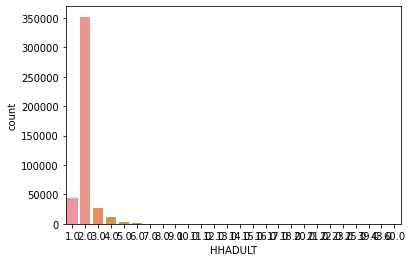

In [ ]:
# HHADULT 
ax = sns.countplot(x="HHADULT",data=diabetes_df85RIi)

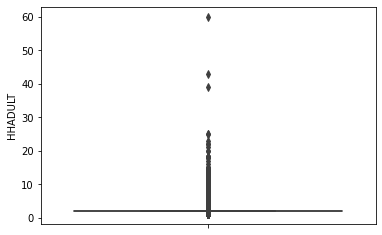

In [ ]:
sns.boxplot( y=diabetes_df85RIi["HHADULT"]);
plt.show()

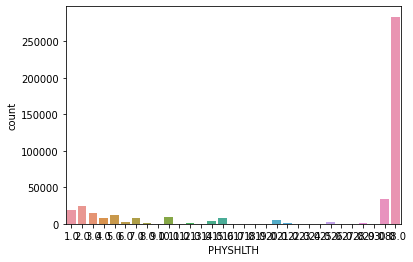

In [ ]:
# PHYSHLTH
ax = sns.countplot(x="PHYSHLTH",data=diabetes_df85RIi)

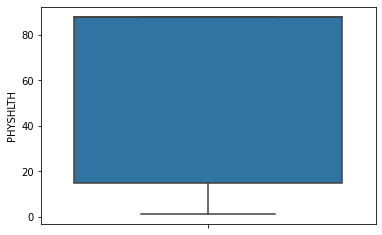

In [ ]:
sns.boxplot( y=diabetes_df85RIi["PHYSHLTH"]);
plt.show()

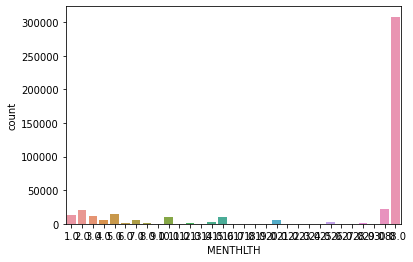

In [ ]:
# MENTHLTH
ax = sns.countplot(x="MENTHLTH",data=diabetes_df85RIi)

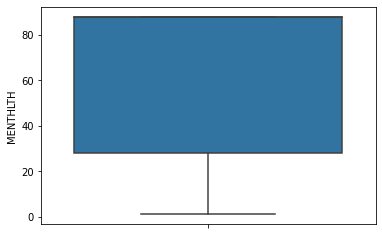

In [ ]:
sns.boxplot( y=diabetes_df85RIi["MENTHLTH"]);
plt.show()

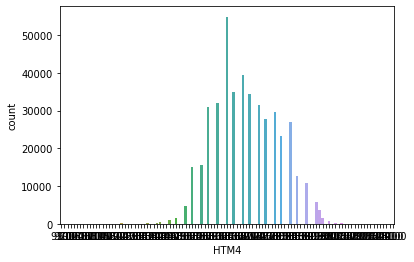

In [ ]:
# HTM4
ax = sns.countplot(x="HTM4",data=diabetes_df85RIi)

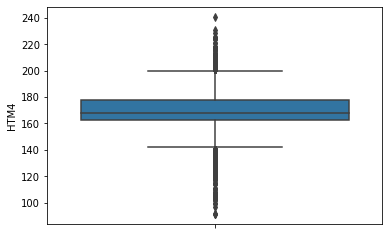

In [ ]:
sns.boxplot( y=diabetes_df85RIi["HTM4"]);
plt.show()

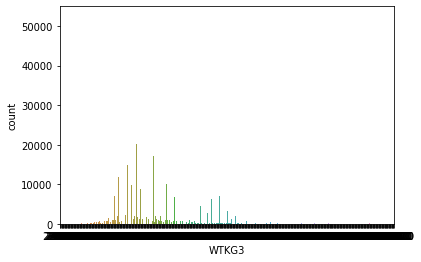

In [ ]:
# WTKG3
ax = sns.countplot(x="WTKG3",data=diabetes_df85RIi)

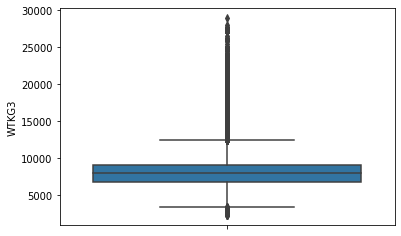

In [ ]:
sns.boxplot( y=diabetes_df85RIi["WTKG3"]);
plt.show()

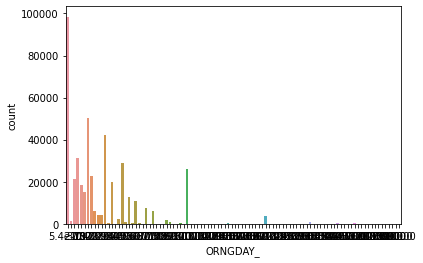

In [ ]:
# ORNGDAY_
ax = sns.countplot(x="ORNGDAY_",data=diabetes_df85RIi)

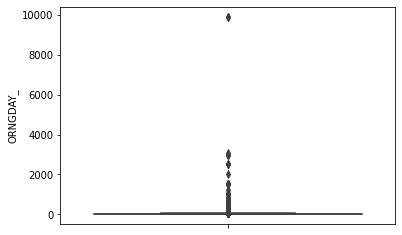

In [ ]:
sns.boxplot( y=diabetes_df85RIi["ORNGDAY_"]);
plt.show()

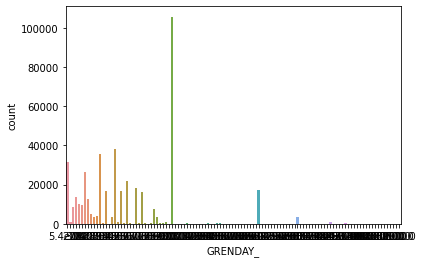

In [ ]:
# GRENDAY_
ax = sns.countplot(x="GRENDAY_",data=diabetes_df85RIi)

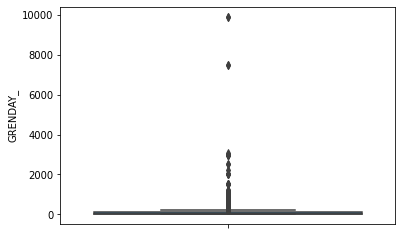

In [ ]:
sns.boxplot( y=diabetes_df85RIi["GRENDAY_"]);
plt.show()

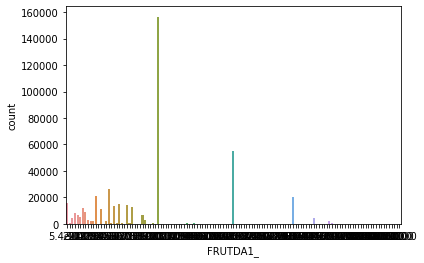

In [ ]:
# FRUTDA1
ax = sns.countplot(x="FRUTDA1_",data=diabetes_df85RIi)

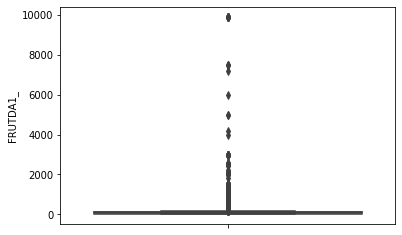

In [ ]:
sns.boxplot( y=diabetes_df85RIi["FRUTDA1_"]);
plt.show()

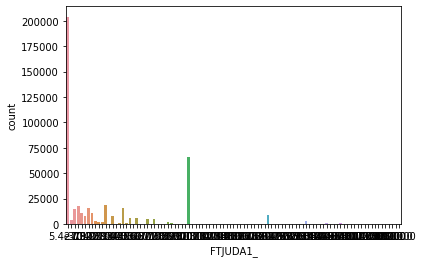

In [ ]:
# FTJUDA1 
ax = sns.countplot(x="FTJUDA1_",data=diabetes_df85RIi)

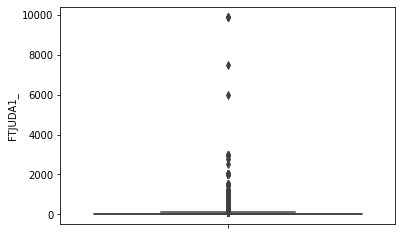

In [ ]:
sns.boxplot( y=diabetes_df85RIi["FTJUDA1_"]);
plt.show()

In [ ]:
# handling outliers for numeric attributes 
# (HHADULT, TRM4, WTKG3, ORNGDAY_, GRENDAY_, FRUTDA1_, 
# FTJUDA1_), 'GENHLTH', 'PHYSHLTH', 'MENTHLTH'

cols = ['HHADULT', 'HTM4', 'WTKG3', 'ORNGDAY_', 'GRENDAY_', 'FRUTDA1_',
        'FTJUDA1_', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH'] 

Q1 = diabetes_df85RIi[cols].quantile(0.25)
Q3 = diabetes_df85RIi[cols].quantile(0.75)
IQR = Q3 - Q1

diabetes_df85RIio = diabetes_df85RIi[~((diabetes_df85RIi[cols]\
                                        < (Q1 - 1.5 * IQR))\
                                        |(diabetes_df85RIi[cols] > \
                                          (Q3 + 1.5 * IQR))).any(axis=1)]


Outliers were handled using the IQR found for each of the variables.

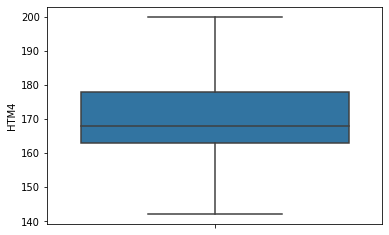

In [ ]:
# HTM4 check 
sns.boxplot( y=diabetes_df85RIio["HTM4"]);
plt.show()

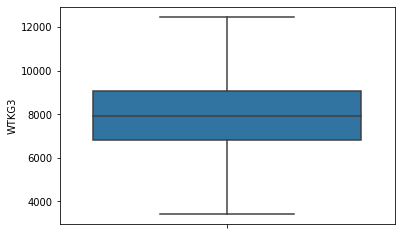

In [ ]:
# WTKG3 check 
sns.boxplot( y=diabetes_df85RIio["WTKG3"]);
plt.show()

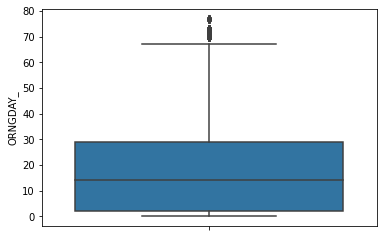

In [ ]:
# ORNGDAY_ check 
sns.boxplot( y=diabetes_df85RIio["ORNGDAY_"]);
plt.show()

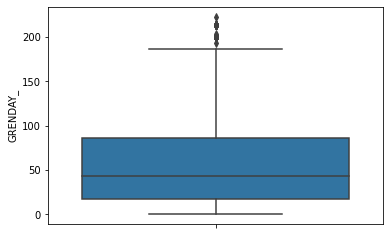

In [ ]:
# GRENDAY_ check 
sns.boxplot( y=diabetes_df85RIio["GRENDAY_"]);
plt.show()

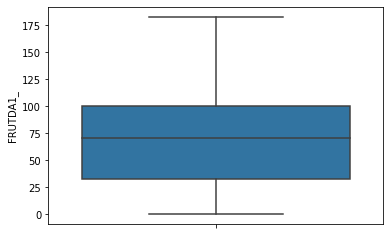

In [ ]:
# FRUTDA1_ check 
sns.boxplot( y=diabetes_df85RIio["FRUTDA1_"]);
plt.show()

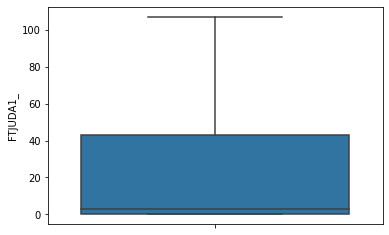

In [ ]:
# FTJUDA1_ check 
sns.boxplot( y=diabetes_df85RIio["FTJUDA1_"]);
plt.show()

In [ ]:
diabetes_df85RIio.describe()

,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,HLTHPLN1,BPMEDS,_RFCHOL,HTM4,WTKG3,ORNGDAY_,GRENDAY_,FRUTDA1_,FTJUDA1_,_SMOKER3,ASTHMA3,_MICHD,SEX,BPHIGH4,DIABETE3
count,204112.0,204112.0,204112.000000,204112.000000,204112.000000,204112.000000,204112.000000,204112.000000,204112.000000,2.041120e+05,2.041120e+05,2.041120e+05,2.041120e+05,204112.000000,204112.000000,204112.000000,204112.000000,204112.000000,204112.000000
mean,2.0,0.0,66.205069,68.374324,0.059428,0.057758,0.357779,169.520205,8005.650119,1.809971e+01,5.196872e+01,6.657320e+01,2.492826e+01,0.125176,0.106912,0.063387,0.439494,0.381781,0.105795
std,0.0,0.0,36.066599,34.554820,0.236425,0.233285,0.479348,10.118063,1656.616988,1.815293e+01,3.972859e+01,3.591539e+01,3.605960e+01,0.330920,0.309002,0.243658,0.496327,0.485824,0.307576
min,2.0,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,142.000000,3402.000000,5.400000e-79,5.400000e-79,5.400000e-79,5.400000e-79,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.0,0.0,30.000000,88.000000,0.000000,0.000000,0.000000,163.000000,6804.000000,2.000000e+00,1.700000e+01,3.300000e+01,5.400000e-79,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.0,0.0,88.000000,88.000000,0.000000,0.000000,0.000000,168.000000,7938.000000,1.400000e+01,4.300000e+01,7.100000e+01,3.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.0,0.0,88.000000,88.000000,0.000000,0.000000,1.000000,178.000000,9072.000000,2.900000e+01,8.600000e+01,1.000000e+02,4.300000e+01,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2.0,0.0,88.000000,88.000000,1.000000,1.000000,1.000000,200.000000,12474.000000,7.700000e+01,2.230000e+02,1.830000e+02,1.070000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
diabetes_df85RIion = diabetes_df85RIio.copy()

# Normalizing the numeric data 
# (HHADULT, HTM4, WTKG3, ORNGDAY_, GRENDAY_, FRUTDA1_, 
# FTJUDA1_, 'GENHLTH', 'PHYSHLTH', 'MENTHLTH') 
diabetes_df85RIion = diabetes_df85RIio.copy()

scaler = StandardScaler()

diabetes_df85RIion.iloc[:,7:13] = scaler.fit_transform(diabetes_df85RIion.iloc\
                                                       [:,7:13].to_numpy())

diabetes_df85RIion.iloc[:,1:2] = scaler.fit_transform(diabetes_df85RIion.iloc\
                                                       [:,1:2].to_numpy())

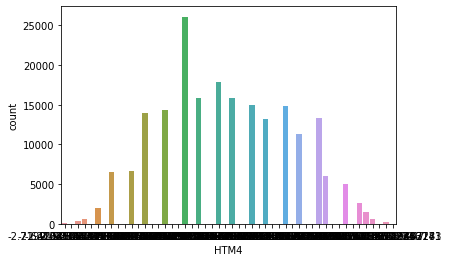

In [ ]:
# ORNGDAY_ check 
ax = sns.countplot(x="HTM4",data=diabetes_df85RIion)

In [ ]:
# Splitting of the data 80% Train/20% Test
x = diabetes_df85RIion.loc[:, diabetes_df85RIion.columns !="DIABETE3"]
y = diabetes_df85RIion['DIABETE3']
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y,
                                                    test_size=0.20,
                                                    random_state=42)

In [ ]:
x_train.shape

(163289, 18)

In [ ]:
y_train.shape

(163289,)

In [ ]:
x_test.shape

(40823, 18)

In [ ]:
y_test.shape

(40823,)

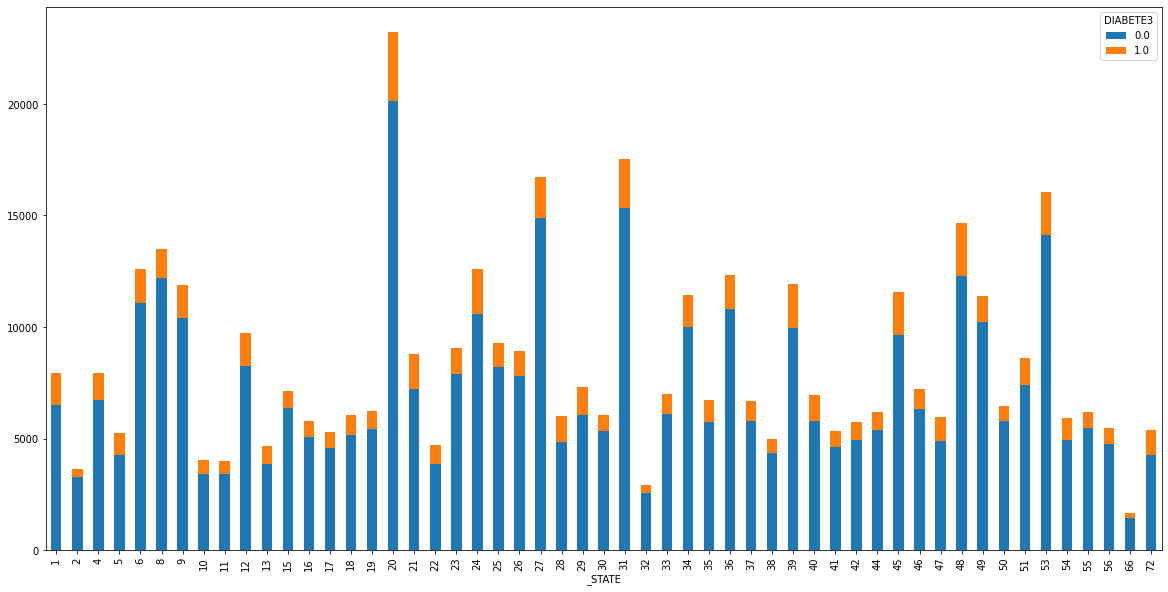

In [ ]:
# Number of people per state with diabetes as an overlay 
crosstab_1 = pd.crosstab(diabetes_df85['_STATE'], diabetes_df85RI['DIABETE3'])
crosstab_1.plot(kind='bar', stacked=True, figsize = (20,10))

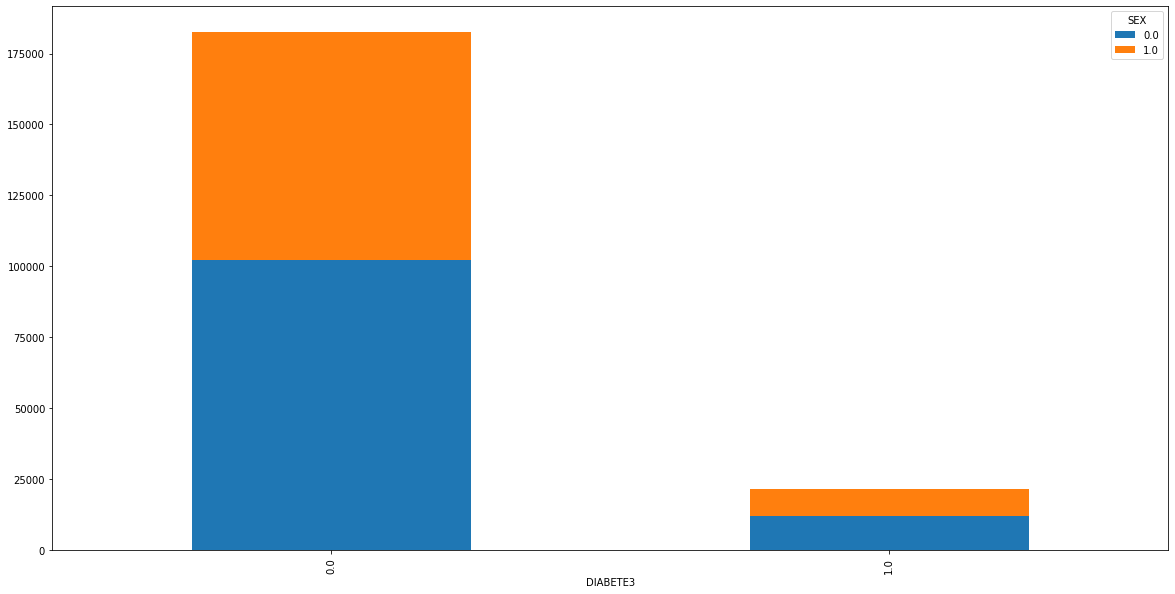

In [ ]:
# EDA: Diabetic vs. Non Diabetic for males vs. females as overlay 
crosstab_1 = pd.crosstab(diabetes_df85RIion['DIABETE3'], diabetes_df85RIion['SEX'])
crosstab_1.plot(kind='bar', stacked=True, figsize = (20,10))

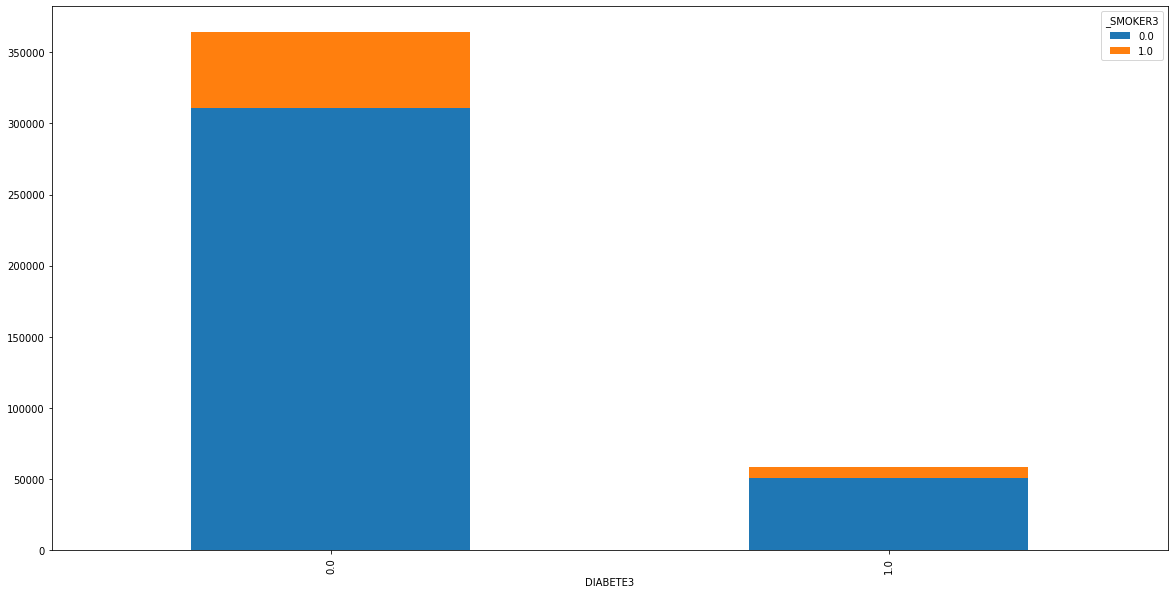

In [ ]:
# EDA: Diabetes vs. Non Diabetic for SMOKERS as overlay 
crosstab_1 = pd.crosstab(diabetes_df85RI['DIABETE3'], diabetes_df85RI['_SMOKER3'])
crosstab_1.plot(kind='bar', stacked=True, figsize = (20,10))

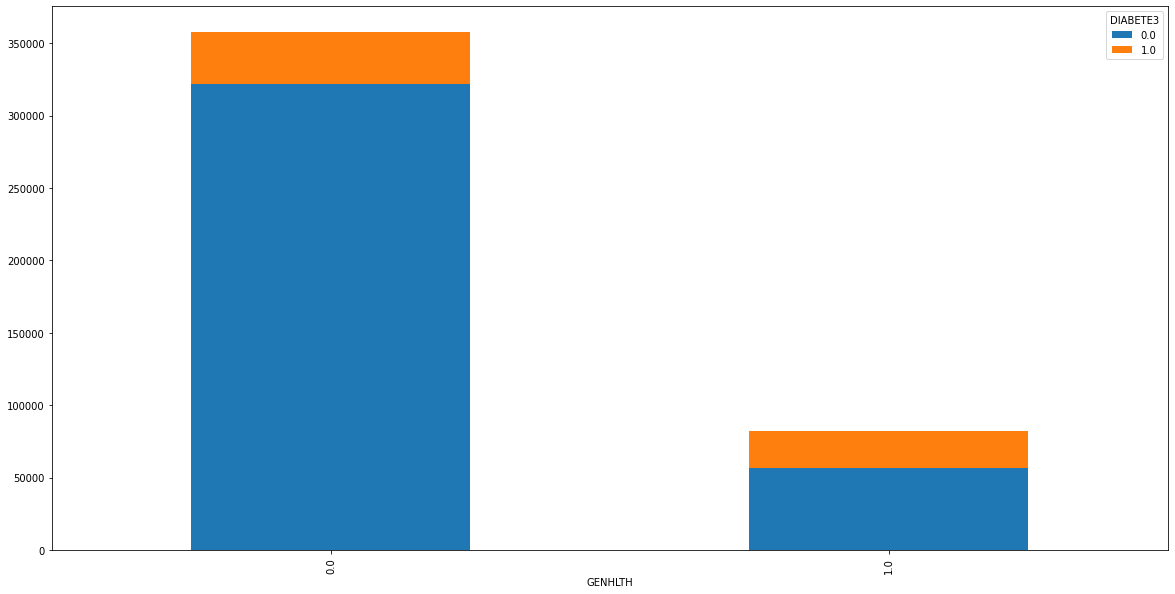

In [ ]:
# GEN HEALTH VS DIABETES 
crosstab_1 = pd.crosstab(diabetes_df85RI['GENHLTH'], 
                         diabetes_df85RI['DIABETE3'])
crosstab_1.plot(kind='bar', stacked=True, figsize = (20,10))

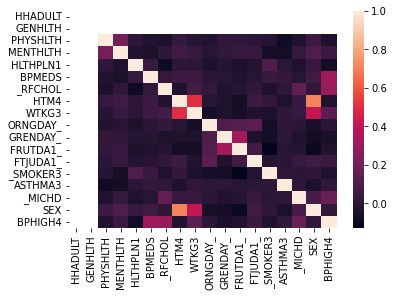

In [ ]:
# Correlation Heatmap 
sns.heatmap(x_train.corr())

x_train, x_test, y_train, and y_test

Model 1: KNN

##### Evaluate KNN Euclidean and Manhattan metric accuracy, to determine which has best results.

In [ ]:
metric='euclidean'
knn_accuracy = []

for i in range(1,10,2):
  clsf = KNeighborsClassifier(metric=metric, n_neighbors=i).fit(x_train, y_train)

  clsf_train_pred = clsf.predict(x_train)
  clsf_test_pred = clsf.predict(x_test)

  knn_accuracy.append({'k values': i, 
                       'Training Accuracy': accuracy_score(clsf_train_pred, y_train), 
                       'Test Accuracy': accuracy_score(clsf_test_pred, y_test)})
  
# Results
print("metric:", metric)
pd.DataFrame(knn_accuracy)

metric: euclidean


,k values,Training Accuracy,Test Accuracy
0,1,0.993453,0.829459
1,3,0.913405,0.870245
2,5,0.902474,0.883913
3,7,0.898493,0.887367
4,9,0.896845,0.890772


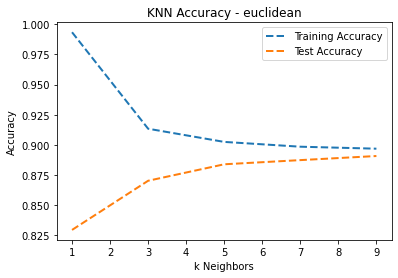

In [ ]:
# Plot
print("\n")

plt.plot(pd.DataFrame(knn_accuracy)['k values'], pd.DataFrame(knn_accuracy)['Training Accuracy'], '--', linewidth=2, label='Training Accuracy')
plt.plot(pd.DataFrame(knn_accuracy)['k values'], pd.DataFrame(knn_accuracy)['Test Accuracy'], '--', linewidth=2, label='Test Accuracy')
plt.xlabel('k Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy - ' + metric)
plt.legend()
plt.show()

In [ ]:
metric='manhattan'
knn_accuracy = []

for i in range(1,10,2):
  clsf = KNeighborsClassifier(metric=metric, n_neighbors=i).fit(x_train, y_train)

  clsf_train_pred = clsf.predict(x_train)
  clsf_test_pred = clsf.predict(x_test)

  knn_accuracy.append({'k values': i, 
                       'Training Accuracy': accuracy_score(clsf_train_pred, y_train), 
                       'Test Accuracy': accuracy_score(clsf_test_pred, y_test)})
  
# Results
print("metric:", metric)
pd.DataFrame(knn_accuracy)

metric: manhattan


,k values,Training Accuracy,Test Accuracy
0,1,0.993453,0.827279
1,3,0.913552,0.870612
2,5,0.902878,0.883620
3,7,0.898670,0.887563
4,9,0.897041,0.889817


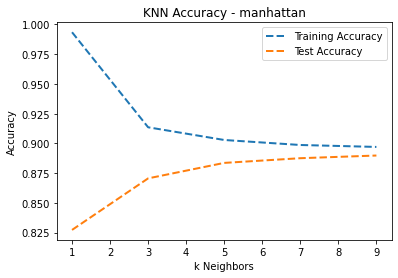

In [ ]:
# Plot
print("\n")

plt.plot(pd.DataFrame(knn_accuracy)['k values'], pd.DataFrame(knn_accuracy)['Training Accuracy'], '--', linewidth=2, label='Training Accuracy')
plt.plot(pd.DataFrame(knn_accuracy)['k values'], pd.DataFrame(knn_accuracy)['Test Accuracy'], '--', linewidth=2, label='Test Accuracy')
plt.xlabel('k Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy - ' + metric)
plt.legend()
plt.show()

Accuracy: 0.8706121549126717


Confusion Matrix:


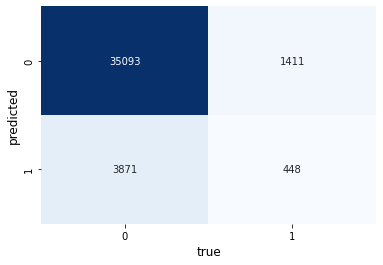



KNN - Manhattan, k = 3


              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93     36504
         1.0       0.24      0.10      0.15      4319

    accuracy                           0.87     40823
   macro avg       0.57      0.53      0.54     40823
weighted avg       0.83      0.87      0.85     40823



In [ ]:
# Manhattan, k = 3
clsf = KNeighborsClassifier(metric='manhattan', n_neighbors=3).fit(x_train, y_train)

# Predict
knn_pred = clsf.predict(x_test)

# Score
clsf_score = clsf.score(x_test, y_test)

# Accuracy
print('Accuracy: {}'.format(clsf_score))

# Confusion matrix
print("\n")
print("Confusion Matrix:")
nb_matrix = confusion_matrix(y_test, knn_pred)
sns.heatmap(nb_matrix, annot=True, fmt='d', cbar=False, cmap="Blues")
plt.xlabel('true', fontsize=12)
plt.ylabel('predicted', fontsize=12)
plt.show()

# Classification Report
print("\n")
print("KNN - Manhattan, k = 3")
print("\n")
print(classification_report(y_test, knn_pred))

Model 2: Naive Bayes

Accuracy: 0.8602748450628322


Confusion Matrix:


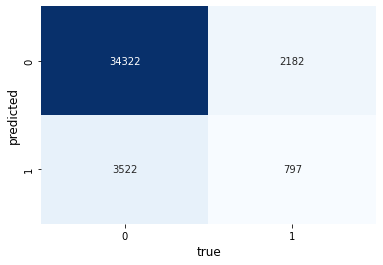



Naive Bayes - Gaussian


              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92     36504
         1.0       0.27      0.18      0.22      4319

    accuracy                           0.86     40823
   macro avg       0.59      0.56      0.57     40823
weighted avg       0.84      0.86      0.85     40823



In [ ]:
# GaussianNB
clf_nb = GaussianNB()
clf_nb.fit(x_train, y_train)

# predict
clf_nb_pred = clf_nb.predict(x_test)

# Score
nb_score = clf_nb.score(x_test, y_test)

# Accuracy
print('Accuracy: {}'.format(nb_score))

# Confusion matrix
print("\n")
print("Confusion Matrix:")
nb_matrix = confusion_matrix(y_test, clf_nb_pred)
sns.heatmap(nb_matrix, annot=True, fmt='d', cbar=False, cmap="Blues")
plt.xlabel('true', fontsize=12)
plt.ylabel('predicted', fontsize=12)
plt.show()

# Classification Report
print("\n")
print("Naive Bayes - Gaussian")
print("\n")
print(classification_report(y_test, clf_nb_pred))

Accuracy: 0.8883472552237709


Confusion Matrix:


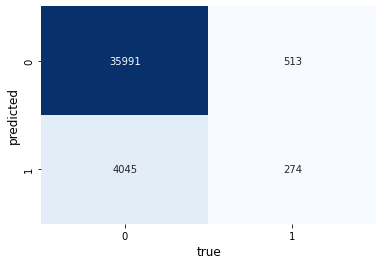



Naive Bayes - Bernoulli


              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     36504
         1.0       0.35      0.06      0.11      4319

    accuracy                           0.89     40823
   macro avg       0.62      0.52      0.52     40823
weighted avg       0.84      0.89      0.85     40823



In [ ]:
# BernoulliNB
clf_nb = BernoulliNB()
clf_nb.fit(x_train, y_train)

# predict
clf_nb_pred = clf_nb.predict(x_test)

# Score
nb_score = clf_nb.score(x_test, y_test)

# Accuracy
print('Accuracy: {}'.format(nb_score))

# Confusion matrix
print("\n")
print("Confusion Matrix:")
nb_matrix = confusion_matrix(y_test, clf_nb_pred)
sns.heatmap(nb_matrix, annot=True, fmt='d', cbar=False, cmap="Blues")
plt.xlabel('true', fontsize=12)
plt.ylabel('predicted', fontsize=12)
plt.show()

# Classification Report
print("\n")
print("Naive Bayes - Bernoulli")
print("\n")
print(classification_report(y_test, clf_nb_pred))

**Model 3: Random Forest**

In [ ]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [ ]:
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
predictions = rf.predict(x_test)

In [ ]:
# Calculate the absolute errors
errors = abs(predictions - y_test)

In [ ]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.19 degrees.


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

In [ ]:
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy,2), '%')

Accuracy: -inf %


In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(x_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')

**Model 4: Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[36447    57]
 [ 4252    67]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.94     36504
         1.0       0.54      0.02      0.03      4319

    accuracy                           0.89     40823
   macro avg       0.72      0.51      0.49     40823
weighted avg       0.86      0.89      0.85     40823



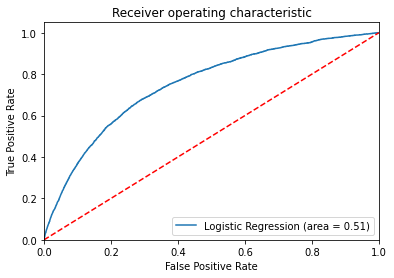

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('504_FinalProject_Group4.ipynb')